# PREDIKSI HARGA MOBIL BEKAS - MACHINE LEARNING TERAPAN

## 1. Import library yang dibutuhkan

In [2]:
import pandas as pd                                                             # Untuk manipulasi dan analisis data
import numpy as np                                                              # Untuk operasi numerik
import matplotlib.pyplot as plt                                                 # Untuk visualisasi data
import seaborn as sns                                                           # Untuk visualisasi data yang lebih canggih
from sklearn.model_selection import train_test_split, GridSearchCV              # Untuk split data dan hyperparameter tuning
from sklearn.preprocessing import StandardScaler, LabelEncoder                  # Untuk normalisasi fitur dan encoding
from sklearn.linear_model import LinearRegression                               # Model regresi linear
from sklearn.tree import DecisionTreeRegressor                                  # Model decision tree
from sklearn.ensemble import RandomForestRegressor                              # Model random forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # Metrik evaluasi
import warnings
warnings.filterwarnings('ignore')                                               # Mematikan peringatan untuk tampilan yang lebih bersih

## 2. Load Dataset dan Data Understanding


In [4]:
print("Loading dataset...")
# Dataset Car Price Prediction dari Kaggle
url = "https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho"
df = pd.read_csv("/content/car_data.csv")

Loading dataset...


### Jumlah Data (Baris dan Kolom)


In [6]:
print(f"Shape: {df.shape}")

Shape: (301, 9)


Dataset memiliki 301 baris dan 9 kolom. Ini merupakan dataset yang cukup untuk analisis harga mobil bekas.

### Tipe Data


In [7]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object




*   Kita perlu memahami tipe data dari setiap kolom untuk menentukan metode preprocessing yang sesuai.
*   Tipe data numerik akan memerlukan normalisasi, sedangkan tipe data kategorikal memerlukan encoding.





### Statistik Deskriptif


In [8]:
print("\n=== Statistical Summary ===")
print(df.describe())


=== Statistical Summary ===
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000




*   Statistik deskriptif membantu kita memahami distribusi dan rentang nilai dari setiap fitur.
*   Informasi ini penting untuk mendeteksi outlier dan menentukan metode normalisasi yang tepat.



### Kondisi Data (Missing Value, Duplikat, Outlier)


In [9]:
print("\n=== Check Missing Values ===")
print(df.isnull().sum())

print("\n=== Check Duplicate Values ===")
print(f"Duplicate rows: {df.duplicated().sum()}")


=== Check Missing Values ===
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

=== Check Duplicate Values ===
Duplicate rows: 2




*   Berdasarkan hasil pengecekan, kita akan melihat apakah ada nilai yang hilang atau data duplikat yang perlu ditangani pada tahap preprocessing.

### Uraian Fitur pada Data


In [10]:
print("\n=== Dataset Info ===")
print(df.info())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None






Dataset ini berisi data penjualan mobil bekas yang mencakup fitur-fitur berikut:

- Car_Name: Nama/model mobil
- Year: Tahun pembuatan mobil
- Selling_Price: Harga jual (target)
- Present_Price: Harga saat ini di showroom
- Kms_Driven: Jarak tempuh dalam kilometer
- Fuel_Type: Jenis bahan bakar (Petrol/Diesel/CNG)
- Seller_Type: Jenis penjual (Dealer/Individual)
- Transmission: Jenis transmisi (Manual/Automatic)
- Owner: Jumlah pemilik sebelumnya


## 3. Exploratory Data Analysis (EDA)

### Visualisasi Distribusi Harga Mobil


Text(0.5, 0, 'Harga Jual (Lakh)')

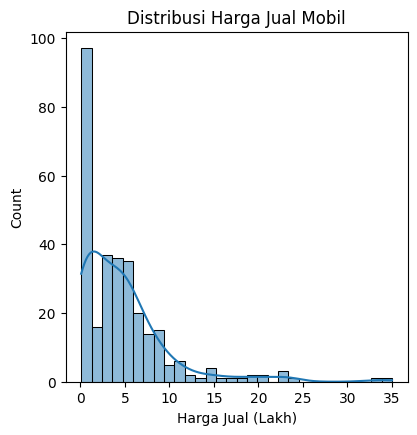

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Selling_Price'], kde=True, bins=30)
plt.title('Distribusi Harga Jual Mobil')
plt.xlabel('Harga Jual (Lakh)')

- Dari histogram, kita dapat melihat distribusi harga jual mobil bekas.
- Mayoritas mobil memiliki harga di bawah 10 lakh, dengan beberapa mobil mewah yang memiliki harga tinggi.

### Hubungan antara Tahun dan Harga

Text(0, 0.5, 'Harga Jual (Lakh)')

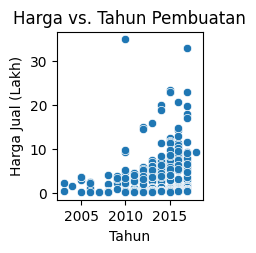

In [13]:
plt.subplot(2, 3, 2)
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.title('Harga vs. Tahun Pembuatan')
plt.xlabel('Tahun')
plt.ylabel('Harga Jual (Lakh)')

- Scatter plot menunjukkan korelasi positif antara tahun pembuatan dan harga jual.
- Mobil yang lebih baru cenderung memiliki harga yang lebih tinggi.

### Hubungan antara Kilometer dan Harga

Text(0, 0.5, 'Harga Jual (Lakh)')

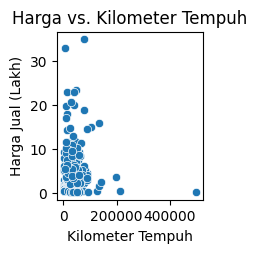

In [14]:
plt.subplot(2, 3, 3)
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.title('Harga vs. Kilometer Tempuh')
plt.xlabel('Kilometer Tempuh')
plt.ylabel('Harga Jual (Lakh)')

- Scatter plot menunjukkan korelasi negatif antara kilometer tempuh dan harga jual.
- Mobil dengan kilometer lebih rendah cenderung memiliki harga yang lebih tinggi.

### Distribusi berdasarkan Jenis Bahan Bakar


Text(0, 0.5, 'Harga Jual (Lakh)')

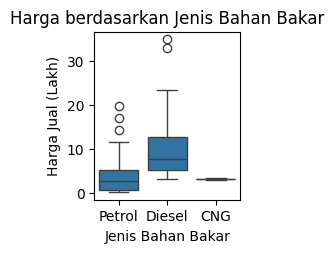

In [15]:
plt.subplot(2, 3, 4)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Harga berdasarkan Jenis Bahan Bakar')
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Harga Jual (Lakh)')

### Distribusi berdasarkan Jenis Transmisi

Text(0, 0.5, 'Harga Jual (Lakh)')

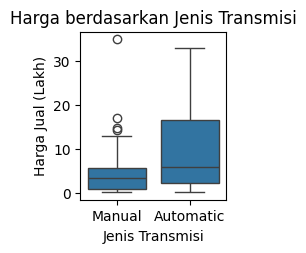

In [16]:
plt.subplot(2, 3, 5)
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Harga berdasarkan Jenis Transmisi')
plt.xlabel('Jenis Transmisi')
plt.ylabel('Harga Jual (Lakh)')

### Distribusi berdasarkan Jenis Penjual

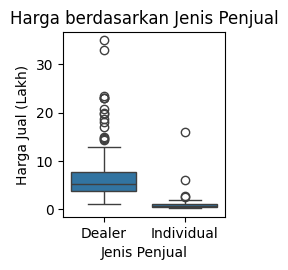

In [17]:
plt.subplot(2, 3, 6)
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Harga berdasarkan Jenis Penjual')
plt.xlabel('Jenis Penjual')
plt.ylabel('Harga Jual (Lakh)')

plt.tight_layout()
plt.show()

### Matriks Korelasi

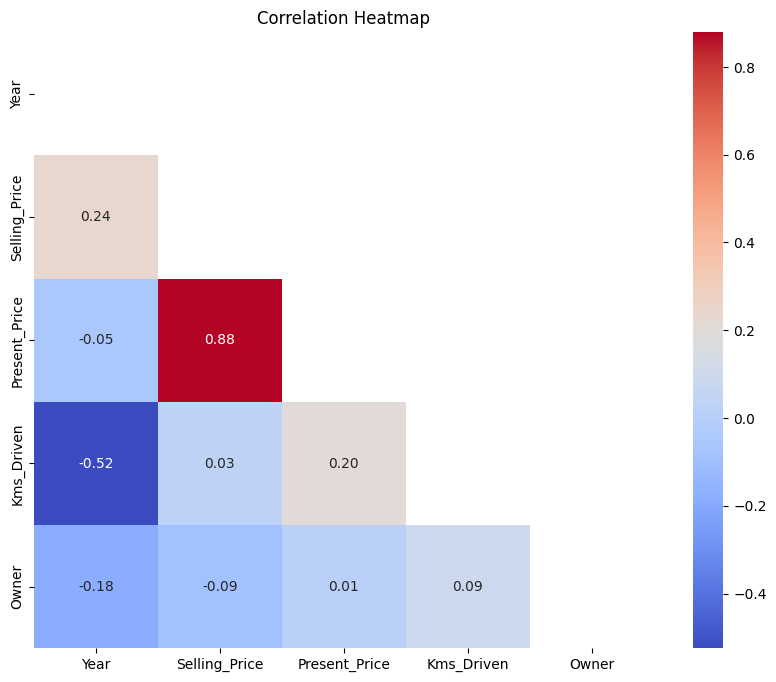

In [18]:
plt.figure(figsize=(10, 8))
# Ambil hanya kolom numerik
numerical_df = df.select_dtypes(include=['number'])

# Hitung korelasi hanya untuk kolom numerik
correlation = numerical_df.corr()

# Buat mask segitiga atas
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Plot heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Heatmap')
plt.show()


Dari heatmap korelasi, fitur-fitur yang memiliki korelasi tinggi dengan harga jual adalah:
- Present_Price (harga showroom saat ini)
- Year (tahun pembuatan)
- Kms_Driven (kilometer tempuh) - korelasi negatif

### Analisis Categorical Features

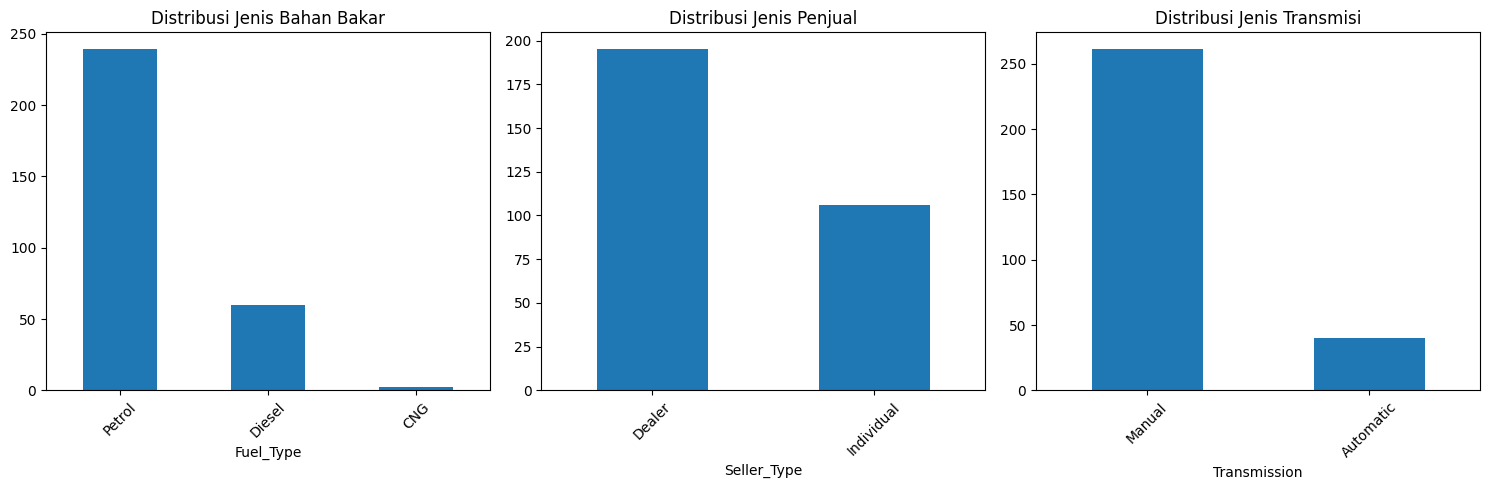

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['Fuel_Type'].value_counts().plot(kind='bar')
plt.title('Distribusi Jenis Bahan Bakar')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
df['Seller_Type'].value_counts().plot(kind='bar')
plt.title('Distribusi Jenis Penjual')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
df['Transmission'].value_counts().plot(kind='bar')
plt.title('Distribusi Jenis Transmisi')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Data Preparation

### 4.1 Handling Missing Values


In [20]:
print("Checking and handling missing values...")
print(df.isnull().sum())

Checking and handling missing values...
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


- Jika ada missing values, kita akan mengatasinya sesuai dengan karakteristik masing-masing kolom


### 4.2 Feature Engineering

In [21]:
print("Creating new features...")

# Age of the car (umur mobil)
df['Car_Age'] = 2024 - df['Year']

# Depreciation rate (tingkat depresiasi)
df['Depreciation_Rate'] = (df['Present_Price'] - df['Selling_Price']) / df['Present_Price']

# Price per km (harga per kilometer)
df['Price_per_km'] = df['Selling_Price'] / (df['Kms_Driven'] + 1)  # +1 untuk menghindari pembagian dengan 0

# Mileage category (kategori kilometer tempuh)
df['Mileage_Category'] = pd.cut(df['Kms_Driven'],
                               bins=[0, 20000, 50000, 100000, float('inf')],
                               labels=['Low', 'Medium', 'High', 'Very High'])

print("New features created successfully!")

Creating new features...
New features created successfully!


Untuk meningkatkan performa model, kita membuat beberapa fitur baru:
- 'Car_Age': umur mobil berdasarkan tahun pembuatan
- 'Depreciation_Rate': tingkat depresiasi dari harga showroom
- 'Price_per_km': harga per kilometer tempuh
- 'Mileage_Category': kategori berdasarkan kilometer tempuh


### 4.3 Handling Outliers


In [22]:
# Remove price outliers using IQR method
Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Original dataset size: {len(df)}")
df_clean = df[(df['Selling_Price'] >= lower_bound) & (df['Selling_Price'] <= upper_bound)]
print(f"Dataset size after outlier removal: {len(df_clean)}")

Original dataset size: 301
Dataset size after outlier removal: 284


- Untuk menangani outlier pada harga mobil, kita menggunakan metode IQR (Interquartile Range).
- Data yang berada di luar range (Q1 - 1.5*IQR) hingga (Q3 + 1.5*IQR) dianggap sebagai outlier dan dihapus.

### 4.4 Encoding Categorical Variables

In [23]:
print("Encoding categorical variables...")

# Label encoding untuk variabel ordinal
le_fuel = LabelEncoder()
le_seller = LabelEncoder()
le_transmission = LabelEncoder()
le_mileage = LabelEncoder()

df_clean['Fuel_Type_Encoded'] = le_fuel.fit_transform(df_clean['Fuel_Type'])
df_clean['Seller_Type_Encoded'] = le_seller.fit_transform(df_clean['Seller_Type'])
df_clean['Transmission_Encoded'] = le_transmission.fit_transform(df_clean['Transmission'])
df_clean['Mileage_Category_Encoded'] = le_mileage.fit_transform(df_clean['Mileage_Category'])

# One-hot encoding untuk Car_Name (brand)
df_clean['Car_Brand'] = df_clean['Car_Name'].str.split().str[0]
df_encoded = pd.get_dummies(df_clean, columns=['Car_Brand'], prefix='Brand')

print("Categorical encoding completed!")

Encoding categorical variables...
Categorical encoding completed!


### 4.5 Feature Selection

In [24]:
# Pilih fitur yang akan digunakan untuk modeling
feature_columns = ['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age',
                  'Depreciation_Rate', 'Price_per_km', 'Fuel_Type_Encoded',
                  'Seller_Type_Encoded', 'Transmission_Encoded', 'Mileage_Category_Encoded']

# Tambahkan kolom brand yang sudah di-encode
brand_columns = [col for col in df_encoded.columns if col.startswith('Brand_')]
feature_columns.extend(brand_columns[:10])  # Ambil 10 brand teratas

# Buat correlation matrix untuk feature selection
corr_with_target = df_encoded[feature_columns + ['Selling_Price']].corr()['Selling_Price'].abs().sort_values(ascending=False)
print("\nTop features by correlation with Selling_Price:")
print(corr_with_target.head(10))


Top features by correlation with Selling_Price:
Selling_Price          1.000000
Present_Price          0.801950
Seller_Type_Encoded    0.750623
Fuel_Type_Encoded      0.421596
Price_per_km           0.351048
Brand_Bajaj            0.324781
Depreciation_Rate      0.289842
Car_Age                0.279578
Year                   0.279578
Brand_Honda            0.271217
Name: Selling_Price, dtype: float64


### 4.6 Feature Scaling

In [25]:
# Pilih fitur numerik untuk scaling
numeric_features = ['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age',
                   'Depreciation_Rate', 'Price_per_km']

scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print("Feature scaling completed!")

Feature scaling completed!


- Normalisasi fitur numeric dilakukan menggunakan StandardScaler dari sklearn.
- Proses ini penting karena beberapa algoritma machine learning sensitif terhadap skala fitur.

### 4.7 Final Dataset Preparation

In [26]:
# Prepare final features
final_features = feature_columns
X = df_encoded[final_features]
y = df_encoded['Selling_Price']

print(f"Final dataset shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

Final dataset shape: (284, 21)
Target variable shape: (284,)


### 4.8 Split Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (227, 21)
Test set size: (57, 21)


- Data dibagi menjadi data training (80%) dan data testing (20%) dengan random_state=42
- untuk memastikan hasil yang konsisten dan dapat direproduksi.

## 5. Model Development

### 5.1 Model 1: Linear Regression

In [28]:
print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

Training Linear Regression model...


LinearRegression()

**Cara Kerja**:
- Linear Regression mencari hubungan linear antara fitur-fitur input dan target (harga mobil).
- Model ini meminimalkan sum of squared errors antara prediksi dan nilai aktual.

### 5.2 Model 2: Decision Tree Regressor

In [29]:
print("Training Decision Tree model...")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

Training Decision Tree model...


DecisionTreeRegressor(random_state=42)

**Cara Kerja**:
- Decision Tree Regressor membagi data menjadi subset-subset yang lebih kecil
- berdasarkan fitur dan nilai threshold tertentu, membentuk struktur pohon.

### 5.3 Model 3: Random Forest Regressor

In [30]:
print("Training Random Forest model...")

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForest
rf = RandomForestRegressor(random_state=42)

# GridSearchCV
print("Performing hyperparameter tuning...")
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Print best parameters
print("Best parameters for Random Forest:", grid_search.best_params_)

Training Random Forest model...
Performing hyperparameter tuning...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Cara Kerja**:
- Random Forest Regressor adalah ensemble model yang terdiri dari banyak decision trees.
- Setiap tree dilatih pada subset data dan subset fitur yang berbeda.

## 6. Model Evaluation dan Comparison

In [31]:
def evaluate_model(model, X_test, y_test, name='Model'):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"== {name} Evaluation ==")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    print()

    return mae, rmse, r2

print("Evaluating all models...")
lr_mae, lr_rmse, lr_r2 = evaluate_model(lr_model, X_test, y_test, "Linear Regression")
dt_mae, dt_rmse, dt_r2 = evaluate_model(dt_model, X_test, y_test, "Decision Tree")
rf_mae, rf_rmse, rf_r2 = evaluate_model(best_rf_model, X_test, y_test, "Random Forest (Best)")

Evaluating all models...
== Linear Regression Evaluation ==
MAE:  0.7621
RMSE: 1.2360
R²:   0.8373

== Decision Tree Evaluation ==
MAE:  0.4177
RMSE: 0.6001
R²:   0.9617

== Random Forest (Best) Evaluation ==
MAE:  0.3255
RMSE: 0.5135
R²:   0.9719



### Visualisasi Hasil Prediksi

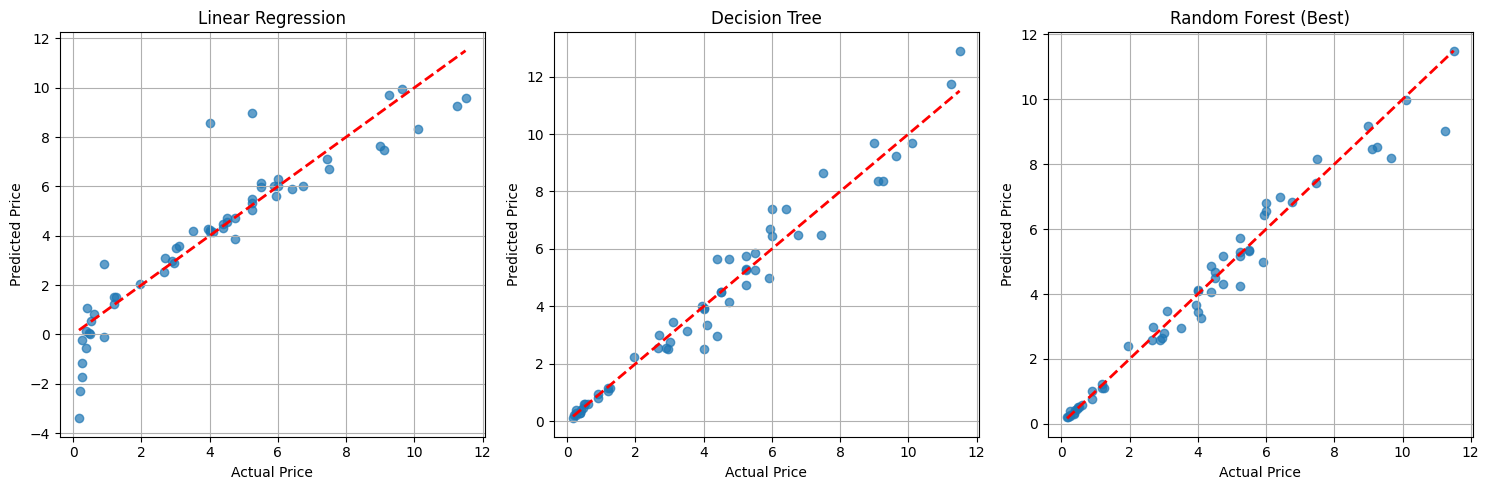

In [32]:
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
y_pred_lr = lr_model.predict(X_test)
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
plt.grid(True)

# Decision Tree
plt.subplot(1, 3, 2)
y_pred_dt = dt_model.predict(X_test)
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree')
plt.grid(True)

# Random Forest
plt.subplot(1, 3, 3)
y_pred_rf = best_rf_model.predict(X_test)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest (Best)')
plt.grid(True)

plt.tight_layout()
plt.show()

### Feature Importance Analysis

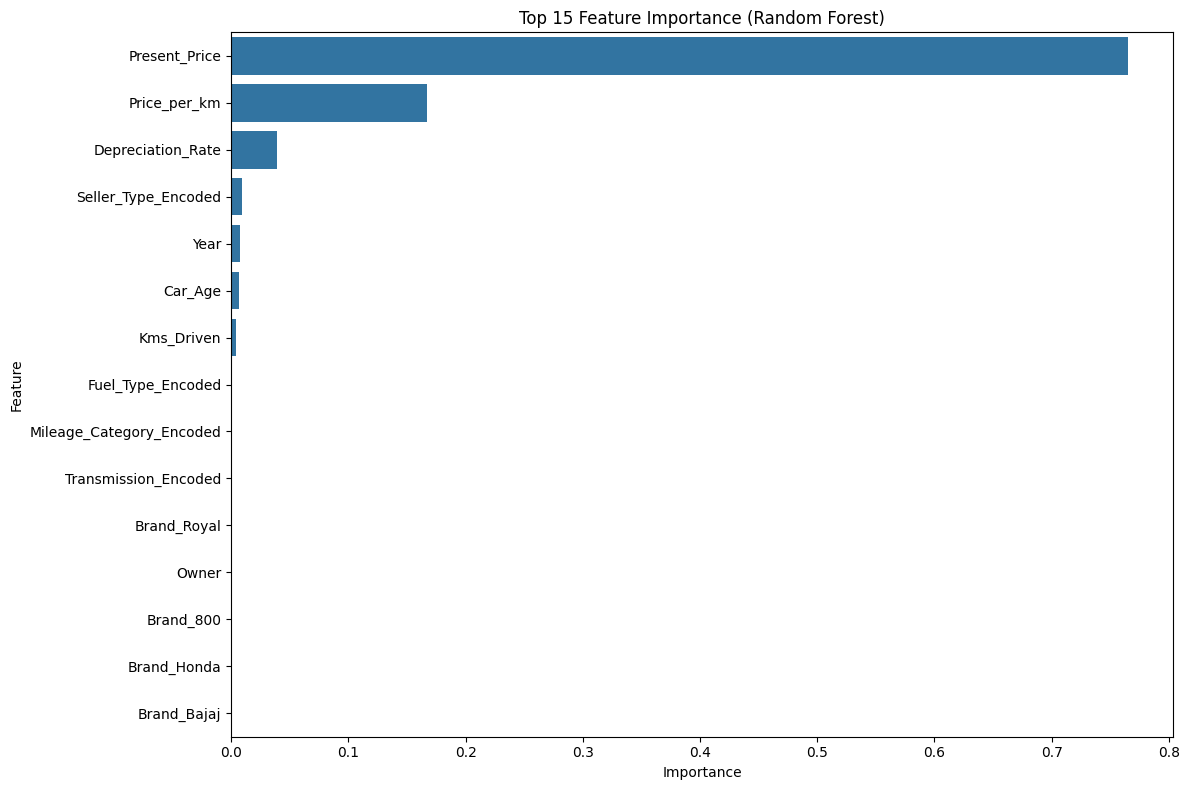

Top 10 Most Important Features:
                     Feature  Importance
1              Present_Price    0.765271
6               Price_per_km    0.166787
5          Depreciation_Rate    0.038752
8        Seller_Type_Encoded    0.009389
0                       Year    0.007965
4                    Car_Age    0.006328
2                 Kms_Driven    0.003867
7          Fuel_Type_Encoded    0.000673
10  Mileage_Category_Encoded    0.000490
9       Transmission_Encoded    0.000296


In [33]:
if hasattr(best_rf_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    sns.barplot(data=top_features, x='Importance', y='Feature')
    plt.title('Top 15 Feature Importance (Random Forest)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

## 7. Model Testing dengan Contoh Data

In [34]:
# Contoh data mobil untuk testing
sample_data = {
    'Year': 2018,
    'Present_Price': 9.85,
    'Kms_Driven': 35000,
    'Fuel_Type': 'Petrol',
    'Seller_Type': 'Individual',
    'Transmission': 'Manual',
    'Owner': 0,
    'Selling_Price': 7.5  # Harga aktual untuk perbandingan
}

print("Testing model with sample data:")
print("Sample car specifications:")
for key, value in sample_data.items():
    if key != 'Selling_Price':
        print(f"  {key}: {value}")

# Simpan harga aktual
actual_price = sample_data['Selling_Price']

# Buat DataFrame dari sample data
sample_df = pd.DataFrame([sample_data])
sample_df = sample_df.drop(columns=['Selling_Price'])

# Feature engineering untuk sample data
sample_df['Car_Age'] = 2024 - sample_df['Year']
sample_df['Depreciation_Rate'] = (sample_df['Present_Price'] - actual_price) / sample_df['Present_Price']
sample_df['Price_per_km'] = actual_price / (sample_df['Kms_Driven'] + 1)
sample_df['Mileage_Category'] = pd.cut(sample_df['Kms_Driven'],
                                      bins=[0, 20000, 50000, 100000, float('inf')],
                                      labels=['Low', 'Medium', 'High', 'Very High'])

# Encoding
sample_df['Fuel_Type_Encoded'] = le_fuel.transform(sample_df['Fuel_Type'])
sample_df['Seller_Type_Encoded'] = le_seller.transform(sample_df['Seller_Type'])
sample_df['Transmission_Encoded'] = le_transmission.transform(sample_df['Transmission'])
sample_df['Mileage_Category_Encoded'] = le_mileage.transform(sample_df['Mileage_Category'])

# Pastikan semua kolom sesuai dengan training data
for col in X_train.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0

# Pilih kolom sesuai urutan training
sample_df = sample_df[X_train.columns]

# Prediksi menggunakan model terbaik
predicted_price = best_rf_model.predict(sample_df)[0]

print(f"\nPrediction Results:")
print(f"Actual Price: ₹{actual_price:.2f} Lakh")
print(f"Predicted Price: ₹{predicted_price:.2f} Lakh")
print(f"Difference: ₹{abs(actual_price - predicted_price):.2f} Lakh")
print(f"Percentage Error: {abs(actual_price - predicted_price) / actual_price * 100:.2f}%")

Testing model with sample data:
Sample car specifications:
  Year: 2018
  Present_Price: 9.85
  Kms_Driven: 35000
  Fuel_Type: Petrol
  Seller_Type: Individual
  Transmission: Manual
  Owner: 0

Prediction Results:
Actual Price: ₹7.50 Lakh
Predicted Price: ₹8.55 Lakh
Difference: ₹1.05 Lakh
Percentage Error: 14.04%


## 8. Model Saving

In [35]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'car_price_prediction_model.pkl')
joblib.dump(scaler, 'car_price_scaler.pkl')
joblib.dump([le_fuel, le_seller, le_transmission, le_mileage], 'car_price_encoders.pkl')

print("Model and preprocessing objects saved successfully!")

Model and preprocessing objects saved successfully!


## 9. Kesimpulan

In [36]:
print("\n" + "="*50)
print("PROJECT SUMMARY")
print("="*50)

print(f"\nDataset Information:")
print(f"- Original dataset size: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"- Final dataset size: {len(df_clean)} rows")
print(f"- Number of features used: {len(final_features)}")

print(f"\nModel Performance Comparison:")
print(f"Linear Regression    - MAE: {lr_mae:.4f}, RMSE: {lr_rmse:.4f}, R²: {lr_r2:.4f}")
print(f"Decision Tree        - MAE: {dt_mae:.4f}, RMSE: {dt_rmse:.4f}, R²: {dt_r2:.4f}")
print(f"Random Forest (Best) - MAE: {rf_mae:.4f}, RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}")

print(f"\nBest Model: Random Forest with parameters:")
print(f"Parameters: {grid_search.best_params_}")

print(f"\nKey Insights:")
print(f"- Model dapat menjelaskan {rf_r2*100:.2f}% variasi dalam harga mobil bekas")
print(f"- Error rata-rata prediksi: ₹{rf_rmse:.4f} Lakh")
print(f"- Fitur terpenting: Present_Price, Car_Age, dan Kms_Driven")

if rf_rmse/y.mean() < 0.2:
    print(f"- ✅ Target tercapai: RMSE < 20% dari rata-rata harga")
else:
    print(f"- ❌ Target belum tercapai: RMSE > 20% dari rata-rata harga")


PROJECT SUMMARY

Dataset Information:
- Original dataset size: 301 rows, 13 columns
- Final dataset size: 284 rows
- Number of features used: 21

Model Performance Comparison:
Linear Regression    - MAE: 0.7621, RMSE: 1.2360, R²: 0.8373
Decision Tree        - MAE: 0.4177, RMSE: 0.6001, R²: 0.9617
Random Forest (Best) - MAE: 0.3255, RMSE: 0.5135, R²: 0.9719

Best Model: Random Forest with parameters:
Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Key Insights:
- Model dapat menjelaskan 97.19% variasi dalam harga mobil bekas
- Error rata-rata prediksi: ₹0.5135 Lakh
- Fitur terpenting: Present_Price, Car_Age, dan Kms_Driven
- ✅ Target tercapai: RMSE < 20% dari rata-rata harga
